In [5]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [6]:
# Minimum 50 games played
download.file("https://raw.githubusercontent.com/Elalalaqqq/DSCI-100-2023W2-GROUP-28/main/data/2022-2023%20NBA%20Player%20Stats%20-%20Regular.csv", "data/nbadata.csv")
nbaStats <- read_csv2("data/nbadata.csv")


filteredStats <- nbaStats |>
                    group_by(Player) |>
                    filter(n() == 1 | Tm == "TOT", G >= 50, !(Pos %in% c("PF-SF", "SF-SG", "SG-PG"))) |>
                    select("Player", "Pos", "FTA", "3PA", "G", "TRB":"PTS")

positionMean <- filteredStats |>
                group_by(Pos) |>
                mutate(across(where(is.character), as.numeric)) |>
                summarize(count = n(), across(everything(), mean, na.rm = TRUE)) |>
                select(-Player, -G)

positionMean

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 679 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (25): Player, Pos, Tm, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, F...
dbl  (4): Rk, Age, G, GS
num  (1): MP

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), as.numeric)`.
ℹ In group 1: `Pos = "C"`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”
Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
ℹ In group 1: `Pos = "C"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply 

Pos,count,FTA,3PA,TRB,AST,STL,BLK,TOV,PF,PTS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C,53,3.016981,1.488679,7.358491,1.949057,0.6188679,1.0358491,1.409434,2.526415,12.04528
PF,59,2.325424,3.101695,5.040678,1.959322,0.6322034,0.5050847,1.240678,1.972881,10.92373
PG,56,3.041071,4.641071,3.446429,4.973214,1.0214286,0.3196429,1.864286,1.921429,14.16964
SF,53,2.181132,3.901887,3.849057,1.843396,0.7226415,0.3452830,1.120755,1.933962,11.41887
SG,74,2.274324,4.587838,3.245946,2.658108,0.7770270,0.2783784,1.390541,1.831081,12.70405


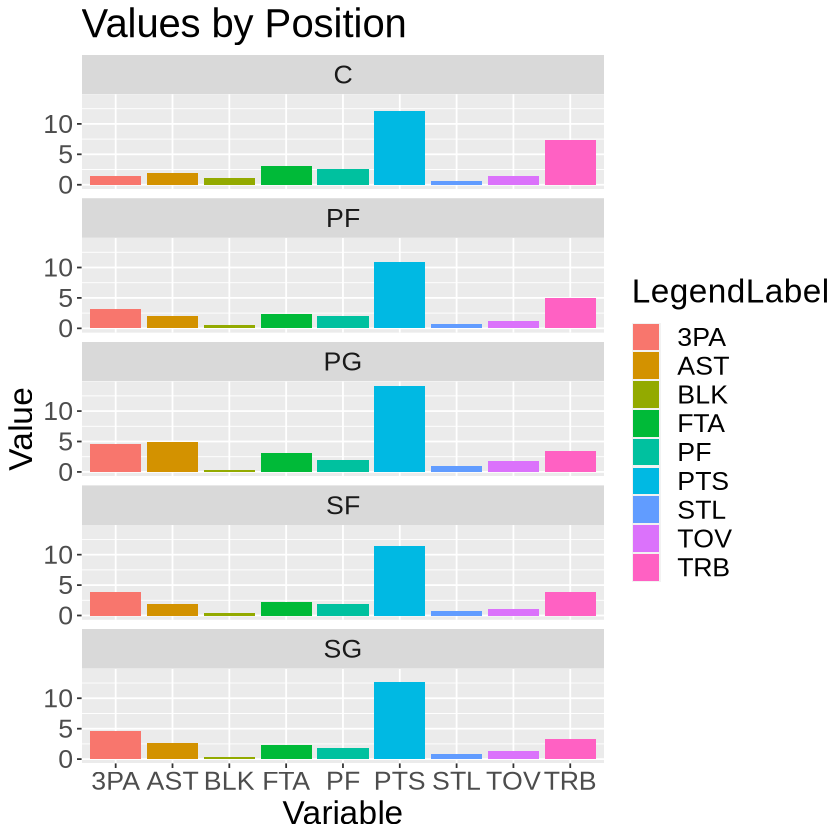

In [16]:
positionMeanLong <- positionMean |>
                    select(-count) |>
                    pivot_longer(cols = -Pos, names_to = "Variable", values_to = "Value")

positionMeanPlot <- positionMeanLong |>
                    ggplot(aes(x = Variable, y = Value, fill = Variable)) +
                    geom_bar(stat = "identity", position = "dodge") +
                    facet_wrap(~Pos, scales = "fixed", ncol = 1) +
                    labs(title = "Values by Position",
                       x = "Variable",
                       y = "Value",
                       fill = "LegendLabel") +
                    theme(text = element_text(size = 20))

positionMeanPlot